# IIC-3641 GML UC

## Actividad en clase

Vamos a usar Node2vec para trabajar con el dataset CORA:

- Entrene 5 representaciones Node2vec para CORA como las realizadas en clases, pero variando el walk_length a 20, 30, 40, 50 y 60.
- Entrene 5 representaciones Node2vec para CORA como las realizadas en clases, pero variando el q en 0.1, 0.5, 1, 1.5 y 2.0.
- Para cada representación, entrene una regresión logística que clasifique los nodos. Mida accuracy.
- Haga los gráficos de accuracy versus walk_length, y accuracy versus 1.
- ¿Cuál es el efecto que tiene el walk length en accuracy?
- ¿Cuál es el efecto que tiene q en accuracy?
- Cuanto termine, me avisa para entregarle una **L (logrado)**.
- Recuerde que las L otorgan un bono en la nota final de la asignatura.

***Tiene hasta el final de la clase.***

In [1]:
import torch

print(torch.__version__)

2.0.0+cu117


In [2]:
from torch_geometric.nn import Node2Vec
import os.path as osp
import torch
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from torch_geometric.datasets import Planetoid
from tqdm.notebook import tqdm
from torch_geometric.datasets import TUDataset

import numpy as np

In [3]:
dataset = 'Cora'
path = osp.join('.', 'data', dataset)
dataset = Planetoid(path, dataset)
data = dataset[0]

In [4]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
model = Node2Vec(data.edge_index, embedding_dim=128, 
                 walk_length=20,                        # lenght of rw
                 context_size=10, walks_per_node=20,    
                 num_negative_samples=1,                # una negativa por cada positiva 
                 p=200, q=1,                            # bias parameters
                 sparse=True).to(device)

/home/marcelo/.local/lib/python3.8/site-packages/torch/cuda/__init__.py:546: UserWarning: Can't initialize NVML
  warnings.warn("Can't initialize NVML")


In [5]:
loader = model.loader(batch_size=128, shuffle=True, num_workers=4)
optimizer = torch.optim.SparseAdam(list(model.parameters()), lr=0.01)

In [6]:
@torch.no_grad()
def test():
    model.eval()
    z = model()
    acc = model.test(z[data.train_mask], data.y[data.train_mask],
                     z[data.test_mask], data.y[data.test_mask],
                     max_iter=150)
    return acc

In [7]:
def train():
    model.train()
    total_loss = 0
    for pos_rw, neg_rw in tqdm(loader):
        optimizer.zero_grad()
        loss = model.loss(pos_rw.to(device), neg_rw.to(device))
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
    return total_loss / len(loader)

In [8]:
for epoch in range(1, 50):
    loss = train()
    acc = test()
    print(f'Epoch: {epoch:02d}, Loss: {loss:.4f}, Acc: {acc:.4f}')

  0%|          | 0/22 [00:00<?, ?it/s]

Epoch: 01, Loss: 8.0256, Acc: 0.1440


  0%|          | 0/22 [00:00<?, ?it/s]

Epoch: 02, Loss: 5.8161, Acc: 0.1810


  0%|          | 0/22 [00:00<?, ?it/s]

Epoch: 03, Loss: 4.6092, Acc: 0.2190


  0%|          | 0/22 [00:00<?, ?it/s]

Epoch: 04, Loss: 3.7352, Acc: 0.2540


  0%|          | 0/22 [00:00<?, ?it/s]

Epoch: 05, Loss: 3.0763, Acc: 0.2910


  0%|          | 0/22 [00:00<?, ?it/s]

Epoch: 06, Loss: 2.5705, Acc: 0.3320


  0%|          | 0/22 [00:00<?, ?it/s]

Epoch: 07, Loss: 2.1791, Acc: 0.3680


  0%|          | 0/22 [00:00<?, ?it/s]

Epoch: 08, Loss: 1.8785, Acc: 0.4040


  0%|          | 0/22 [00:00<?, ?it/s]

Epoch: 09, Loss: 1.6511, Acc: 0.4450


  0%|          | 0/22 [00:00<?, ?it/s]

Epoch: 10, Loss: 1.4736, Acc: 0.4820


  0%|          | 0/22 [00:00<?, ?it/s]

Epoch: 11, Loss: 1.3390, Acc: 0.5080


  0%|          | 0/22 [00:00<?, ?it/s]

Epoch: 12, Loss: 1.2353, Acc: 0.5340


  0%|          | 0/22 [00:00<?, ?it/s]

Epoch: 13, Loss: 1.1554, Acc: 0.5520


  0%|          | 0/22 [00:00<?, ?it/s]

Epoch: 14, Loss: 1.0955, Acc: 0.5770


  0%|          | 0/22 [00:00<?, ?it/s]

Epoch: 15, Loss: 1.0489, Acc: 0.6050


  0%|          | 0/22 [00:00<?, ?it/s]

Epoch: 16, Loss: 1.0116, Acc: 0.6140


  0%|          | 0/22 [00:00<?, ?it/s]

Epoch: 17, Loss: 0.9826, Acc: 0.6300


  0%|          | 0/22 [00:00<?, ?it/s]

Epoch: 18, Loss: 0.9599, Acc: 0.6430


  0%|          | 0/22 [00:00<?, ?it/s]

Epoch: 19, Loss: 0.9421, Acc: 0.6520


  0%|          | 0/22 [00:00<?, ?it/s]

Epoch: 20, Loss: 0.9271, Acc: 0.6630


  0%|          | 0/22 [00:00<?, ?it/s]

Epoch: 21, Loss: 0.9142, Acc: 0.6710


  0%|          | 0/22 [00:00<?, ?it/s]

Epoch: 22, Loss: 0.9042, Acc: 0.6800


  0%|          | 0/22 [00:00<?, ?it/s]

Epoch: 23, Loss: 0.8947, Acc: 0.6720


  0%|          | 0/22 [00:00<?, ?it/s]

Epoch: 24, Loss: 0.8865, Acc: 0.6790


  0%|          | 0/22 [00:00<?, ?it/s]

Epoch: 25, Loss: 0.8814, Acc: 0.6750


  0%|          | 0/22 [00:00<?, ?it/s]

Epoch: 26, Loss: 0.8750, Acc: 0.6810


  0%|          | 0/22 [00:00<?, ?it/s]

Epoch: 27, Loss: 0.8704, Acc: 0.6850


  0%|          | 0/22 [00:00<?, ?it/s]

Epoch: 28, Loss: 0.8675, Acc: 0.6870


  0%|          | 0/22 [00:00<?, ?it/s]

Epoch: 29, Loss: 0.8625, Acc: 0.6900


  0%|          | 0/22 [00:00<?, ?it/s]

Epoch: 30, Loss: 0.8597, Acc: 0.6900


  0%|          | 0/22 [00:00<?, ?it/s]

Epoch: 31, Loss: 0.8565, Acc: 0.6850


  0%|          | 0/22 [00:00<?, ?it/s]

Epoch: 32, Loss: 0.8544, Acc: 0.6860


  0%|          | 0/22 [00:00<?, ?it/s]

Epoch: 33, Loss: 0.8520, Acc: 0.6970


  0%|          | 0/22 [00:00<?, ?it/s]

Epoch: 34, Loss: 0.8498, Acc: 0.6950


  0%|          | 0/22 [00:00<?, ?it/s]

Epoch: 35, Loss: 0.8475, Acc: 0.7000


  0%|          | 0/22 [00:00<?, ?it/s]

Epoch: 36, Loss: 0.8452, Acc: 0.6930


  0%|          | 0/22 [00:00<?, ?it/s]

Epoch: 37, Loss: 0.8443, Acc: 0.6890


  0%|          | 0/22 [00:00<?, ?it/s]

Epoch: 38, Loss: 0.8424, Acc: 0.6820


  0%|          | 0/22 [00:00<?, ?it/s]

Epoch: 39, Loss: 0.8409, Acc: 0.6860


  0%|          | 0/22 [00:00<?, ?it/s]

Epoch: 40, Loss: 0.8403, Acc: 0.6930


  0%|          | 0/22 [00:00<?, ?it/s]

Epoch: 41, Loss: 0.8386, Acc: 0.6930


  0%|          | 0/22 [00:00<?, ?it/s]

Epoch: 42, Loss: 0.8385, Acc: 0.6920


  0%|          | 0/22 [00:00<?, ?it/s]

Epoch: 43, Loss: 0.8372, Acc: 0.6930


  0%|          | 0/22 [00:00<?, ?it/s]

Epoch: 44, Loss: 0.8364, Acc: 0.6940


  0%|          | 0/22 [00:00<?, ?it/s]

Epoch: 45, Loss: 0.8353, Acc: 0.7020


  0%|          | 0/22 [00:00<?, ?it/s]

Epoch: 46, Loss: 0.8343, Acc: 0.7050


  0%|          | 0/22 [00:00<?, ?it/s]

Epoch: 47, Loss: 0.8347, Acc: 0.7120


  0%|          | 0/22 [00:00<?, ?it/s]

Epoch: 48, Loss: 0.8334, Acc: 0.7170


  0%|          | 0/22 [00:00<?, ?it/s]

Epoch: 49, Loss: 0.8322, Acc: 0.7130


In [9]:
@torch.no_grad()
def return_model():
    model.eval()
    z = model(torch.arange(data.num_nodes, device=device))
    X = z.cpu().numpy()
    return X

X = return_model()
y = data.y.numpy()

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train a classifier
clf = LogisticRegression(max_iter=1000)
clf.fit(X_train, y_train)

# Predict and evaluate
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

Accuracy: 0.8057


In [11]:
model = Node2Vec(data.edge_index, embedding_dim=128, 
                 walk_length=30,                        # lenght of rw
                 context_size=10, walks_per_node=30,    
                 num_negative_samples=1,                # una negativa por cada positiva 
                 p=200, q=1,                            # bias parameters
                 sparse=True).to(device)

loader = model.loader(batch_size=128, shuffle=True, num_workers=4)
optimizer = torch.optim.SparseAdam(list(model.parameters()), lr=0.01)

for epoch in range(1, 50):
    loss = train()
    acc = test()
    print(f'Epoch: {epoch:02d}, Loss: {loss:.4f}, Acc: {acc:.4f}')

@torch.no_grad()
def return_model():
    model.eval()
    z = model(torch.arange(data.num_nodes, device=device))
    X = z.cpu().numpy()
    return X

X = return_model()
y = data.y.numpy()

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train a classifier
clf = LogisticRegression(max_iter=1000)
clf.fit(X_train, y_train)

# Predict and evaluate
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

  0%|          | 0/22 [00:00<?, ?it/s]

Epoch: 01, Loss: 7.7164, Acc: 0.1610


  0%|          | 0/22 [00:00<?, ?it/s]

Epoch: 02, Loss: 5.3490, Acc: 0.1870


  0%|          | 0/22 [00:00<?, ?it/s]

Epoch: 03, Loss: 4.0575, Acc: 0.2360


  0%|          | 0/22 [00:00<?, ?it/s]

Epoch: 04, Loss: 3.1480, Acc: 0.3010


  0%|          | 0/22 [00:00<?, ?it/s]

Epoch: 05, Loss: 2.5110, Acc: 0.3530


  0%|          | 0/22 [00:00<?, ?it/s]

Epoch: 06, Loss: 2.0570, Acc: 0.3970


  0%|          | 0/22 [00:00<?, ?it/s]

Epoch: 07, Loss: 1.7301, Acc: 0.4390


  0%|          | 0/22 [00:00<?, ?it/s]

Epoch: 08, Loss: 1.5003, Acc: 0.4840


  0%|          | 0/22 [00:00<?, ?it/s]

Epoch: 09, Loss: 1.3310, Acc: 0.5240


  0%|          | 0/22 [00:00<?, ?it/s]

Epoch: 10, Loss: 1.2126, Acc: 0.5470


  0%|          | 0/22 [00:00<?, ?it/s]

Epoch: 11, Loss: 1.1257, Acc: 0.5700


  0%|          | 0/22 [00:00<?, ?it/s]

Epoch: 12, Loss: 1.0634, Acc: 0.5980


  0%|          | 0/22 [00:00<?, ?it/s]

Epoch: 13, Loss: 1.0185, Acc: 0.6110


  0%|          | 0/22 [00:00<?, ?it/s]

Epoch: 14, Loss: 0.9832, Acc: 0.6260


  0%|          | 0/22 [00:00<?, ?it/s]

Epoch: 15, Loss: 0.9582, Acc: 0.6470


  0%|          | 0/22 [00:00<?, ?it/s]

Epoch: 16, Loss: 0.9375, Acc: 0.6480


  0%|          | 0/22 [00:00<?, ?it/s]

Epoch: 17, Loss: 0.9203, Acc: 0.6630


  0%|          | 0/22 [00:00<?, ?it/s]

Epoch: 18, Loss: 0.9074, Acc: 0.6690


  0%|          | 0/22 [00:00<?, ?it/s]

Epoch: 19, Loss: 0.8969, Acc: 0.6730


  0%|          | 0/22 [00:00<?, ?it/s]

Epoch: 20, Loss: 0.8876, Acc: 0.6840


  0%|          | 0/22 [00:00<?, ?it/s]

Epoch: 21, Loss: 0.8793, Acc: 0.6870


  0%|          | 0/22 [00:00<?, ?it/s]

Epoch: 22, Loss: 0.8738, Acc: 0.6860


  0%|          | 0/22 [00:00<?, ?it/s]

Epoch: 23, Loss: 0.8677, Acc: 0.6880


  0%|          | 0/22 [00:00<?, ?it/s]

Epoch: 24, Loss: 0.8634, Acc: 0.6910


  0%|          | 0/22 [00:00<?, ?it/s]

Epoch: 25, Loss: 0.8602, Acc: 0.6900


  0%|          | 0/22 [00:00<?, ?it/s]

Epoch: 26, Loss: 0.8567, Acc: 0.6950


  0%|          | 0/22 [00:00<?, ?it/s]

Epoch: 27, Loss: 0.8534, Acc: 0.7010


  0%|          | 0/22 [00:00<?, ?it/s]

Epoch: 28, Loss: 0.8505, Acc: 0.6960


  0%|          | 0/22 [00:00<?, ?it/s]

Epoch: 29, Loss: 0.8471, Acc: 0.6970


  0%|          | 0/22 [00:00<?, ?it/s]

Epoch: 30, Loss: 0.8456, Acc: 0.7040


  0%|          | 0/22 [00:00<?, ?it/s]

Epoch: 31, Loss: 0.8431, Acc: 0.7030


  0%|          | 0/22 [00:00<?, ?it/s]

Epoch: 32, Loss: 0.8420, Acc: 0.7010


  0%|          | 0/22 [00:00<?, ?it/s]

Epoch: 33, Loss: 0.8407, Acc: 0.7040


  0%|          | 0/22 [00:00<?, ?it/s]

Epoch: 34, Loss: 0.8386, Acc: 0.7110


  0%|          | 0/22 [00:00<?, ?it/s]

Epoch: 35, Loss: 0.8375, Acc: 0.7150


  0%|          | 0/22 [00:00<?, ?it/s]

Epoch: 36, Loss: 0.8369, Acc: 0.7190


  0%|          | 0/22 [00:00<?, ?it/s]

Epoch: 37, Loss: 0.8353, Acc: 0.7190


  0%|          | 0/22 [00:00<?, ?it/s]

Epoch: 38, Loss: 0.8347, Acc: 0.7220


  0%|          | 0/22 [00:00<?, ?it/s]

Epoch: 39, Loss: 0.8344, Acc: 0.7210


  0%|          | 0/22 [00:00<?, ?it/s]

Epoch: 40, Loss: 0.8324, Acc: 0.7210


  0%|          | 0/22 [00:00<?, ?it/s]

Epoch: 41, Loss: 0.8323, Acc: 0.7210


  0%|          | 0/22 [00:00<?, ?it/s]

Epoch: 42, Loss: 0.8310, Acc: 0.7250


  0%|          | 0/22 [00:00<?, ?it/s]

Epoch: 43, Loss: 0.8308, Acc: 0.7230


  0%|          | 0/22 [00:00<?, ?it/s]

Epoch: 44, Loss: 0.8299, Acc: 0.7180


  0%|          | 0/22 [00:00<?, ?it/s]

Epoch: 45, Loss: 0.8300, Acc: 0.7210


  0%|          | 0/22 [00:00<?, ?it/s]

Epoch: 46, Loss: 0.8287, Acc: 0.7190


  0%|          | 0/22 [00:00<?, ?it/s]

Epoch: 47, Loss: 0.8286, Acc: 0.7240


  0%|          | 0/22 [00:00<?, ?it/s]

Epoch: 48, Loss: 0.8278, Acc: 0.7230


  0%|          | 0/22 [00:00<?, ?it/s]

Epoch: 49, Loss: 0.8277, Acc: 0.7200
Accuracy: 0.8266


In [12]:
model = Node2Vec(data.edge_index, embedding_dim=128, 
                 walk_length=40,                        # lenght of rw
                 context_size=10, walks_per_node=40,    
                 num_negative_samples=1,                # una negativa por cada positiva 
                 p=200, q=1,                            # bias parameters
                 sparse=True).to(device)

loader = model.loader(batch_size=128, shuffle=True, num_workers=4)
optimizer = torch.optim.SparseAdam(list(model.parameters()), lr=0.01)

for epoch in range(1, 50):
    loss = train()
    acc = test()
    print(f'Epoch: {epoch:02d}, Loss: {loss:.4f}, Acc: {acc:.4f}')


@torch.no_grad()
def return_model():
    model.eval()
    z = model(torch.arange(data.num_nodes, device=device))
    X = z.cpu().numpy()
    return X

X = return_model()
y = data.y.numpy()

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train a classifier
clf = LogisticRegression(max_iter=1000)
clf.fit(X_train, y_train)

# Predict and evaluate
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

  0%|          | 0/22 [00:00<?, ?it/s]

Epoch: 01, Loss: 7.6278, Acc: 0.1920


  0%|          | 0/22 [00:00<?, ?it/s]

Epoch: 02, Loss: 5.1800, Acc: 0.2390


  0%|          | 0/22 [00:00<?, ?it/s]

Epoch: 03, Loss: 3.8208, Acc: 0.3010


  0%|          | 0/22 [00:00<?, ?it/s]

Epoch: 04, Loss: 2.8992, Acc: 0.3650


  0%|          | 0/22 [00:00<?, ?it/s]

Epoch: 05, Loss: 2.2765, Acc: 0.4060


  0%|          | 0/22 [00:00<?, ?it/s]

Epoch: 06, Loss: 1.8541, Acc: 0.4530


  0%|          | 0/22 [00:00<?, ?it/s]

Epoch: 07, Loss: 1.5608, Acc: 0.4880


  0%|          | 0/22 [00:00<?, ?it/s]

Epoch: 08, Loss: 1.3602, Acc: 0.5260


  0%|          | 0/22 [00:00<?, ?it/s]

Epoch: 09, Loss: 1.2214, Acc: 0.5530


  0%|          | 0/22 [00:00<?, ?it/s]

Epoch: 10, Loss: 1.1251, Acc: 0.5900


  0%|          | 0/22 [00:00<?, ?it/s]

Epoch: 11, Loss: 1.0571, Acc: 0.6100


  0%|          | 0/22 [00:00<?, ?it/s]

Epoch: 12, Loss: 1.0098, Acc: 0.6340


  0%|          | 0/22 [00:00<?, ?it/s]

Epoch: 13, Loss: 0.9730, Acc: 0.6510


  0%|          | 0/22 [00:00<?, ?it/s]

Epoch: 14, Loss: 0.9474, Acc: 0.6640


  0%|          | 0/22 [00:00<?, ?it/s]

Epoch: 15, Loss: 0.9263, Acc: 0.6720


  0%|          | 0/22 [00:00<?, ?it/s]

Epoch: 16, Loss: 0.9114, Acc: 0.6790


  0%|          | 0/22 [00:00<?, ?it/s]

Epoch: 17, Loss: 0.8979, Acc: 0.6840


  0%|          | 0/22 [00:00<?, ?it/s]

Epoch: 18, Loss: 0.8889, Acc: 0.6970


  0%|          | 0/22 [00:00<?, ?it/s]

Epoch: 19, Loss: 0.8793, Acc: 0.7020


  0%|          | 0/22 [00:00<?, ?it/s]

Epoch: 20, Loss: 0.8726, Acc: 0.7080


  0%|          | 0/22 [00:00<?, ?it/s]

Epoch: 21, Loss: 0.8668, Acc: 0.7080


  0%|          | 0/22 [00:00<?, ?it/s]

Epoch: 22, Loss: 0.8615, Acc: 0.7080


  0%|          | 0/22 [00:00<?, ?it/s]

Epoch: 23, Loss: 0.8580, Acc: 0.7100


  0%|          | 0/22 [00:00<?, ?it/s]

Epoch: 24, Loss: 0.8536, Acc: 0.7110


  0%|          | 0/22 [00:00<?, ?it/s]

Epoch: 25, Loss: 0.8505, Acc: 0.7170


  0%|          | 0/22 [00:00<?, ?it/s]

Epoch: 26, Loss: 0.8478, Acc: 0.7170


  0%|          | 0/22 [00:00<?, ?it/s]

Epoch: 27, Loss: 0.8458, Acc: 0.7170


  0%|          | 0/22 [00:00<?, ?it/s]

Epoch: 28, Loss: 0.8431, Acc: 0.7180


  0%|          | 0/22 [00:00<?, ?it/s]

Epoch: 29, Loss: 0.8413, Acc: 0.7150


  0%|          | 0/22 [00:00<?, ?it/s]

Epoch: 30, Loss: 0.8401, Acc: 0.7160


  0%|          | 0/22 [00:00<?, ?it/s]

Epoch: 31, Loss: 0.8382, Acc: 0.7200


  0%|          | 0/22 [00:00<?, ?it/s]

Epoch: 32, Loss: 0.8366, Acc: 0.7190


  0%|          | 0/22 [00:00<?, ?it/s]

Epoch: 33, Loss: 0.8354, Acc: 0.7100


  0%|          | 0/22 [00:00<?, ?it/s]

Epoch: 34, Loss: 0.8339, Acc: 0.7160


  0%|          | 0/22 [00:00<?, ?it/s]

Epoch: 35, Loss: 0.8328, Acc: 0.7150


  0%|          | 0/22 [00:00<?, ?it/s]

Epoch: 36, Loss: 0.8320, Acc: 0.7160


  0%|          | 0/22 [00:00<?, ?it/s]

Epoch: 37, Loss: 0.8316, Acc: 0.7130


  0%|          | 0/22 [00:00<?, ?it/s]

Epoch: 38, Loss: 0.8309, Acc: 0.7220


  0%|          | 0/22 [00:00<?, ?it/s]

Epoch: 39, Loss: 0.8291, Acc: 0.7150


  0%|          | 0/22 [00:00<?, ?it/s]

Epoch: 40, Loss: 0.8291, Acc: 0.7190


  0%|          | 0/22 [00:00<?, ?it/s]

Epoch: 41, Loss: 0.8287, Acc: 0.7160


  0%|          | 0/22 [00:00<?, ?it/s]

Epoch: 42, Loss: 0.8275, Acc: 0.7120


  0%|          | 0/22 [00:00<?, ?it/s]

Epoch: 43, Loss: 0.8273, Acc: 0.7150


  0%|          | 0/22 [00:00<?, ?it/s]

Epoch: 44, Loss: 0.8269, Acc: 0.7120


  0%|          | 0/22 [00:00<?, ?it/s]

Epoch: 45, Loss: 0.8265, Acc: 0.7180


  0%|          | 0/22 [00:00<?, ?it/s]

Epoch: 46, Loss: 0.8261, Acc: 0.7180


  0%|          | 0/22 [00:00<?, ?it/s]

Epoch: 47, Loss: 0.8253, Acc: 0.7170


  0%|          | 0/22 [00:00<?, ?it/s]

Epoch: 48, Loss: 0.8249, Acc: 0.7160


  0%|          | 0/22 [00:00<?, ?it/s]

Epoch: 49, Loss: 0.8255, Acc: 0.7180
Accuracy: 0.8180


In [13]:
model = Node2Vec(data.edge_index, embedding_dim=128, 
                 walk_length=50,                        # lenght of rw
                 context_size=10, walks_per_node=40,    
                 num_negative_samples=1,                # una negativa por cada positiva 
                 p=200, q=1,                            # bias parameters
                 sparse=True).to(device)

loader = model.loader(batch_size=128, shuffle=True, num_workers=4)
optimizer = torch.optim.SparseAdam(list(model.parameters()), lr=0.01)

for epoch in range(1, 50):
    loss = train()
    acc = test()
    print(f'Epoch: {epoch:02d}, Loss: {loss:.4f}, Acc: {acc:.4f}')


@torch.no_grad()
def return_model():
    model.eval()
    z = model(torch.arange(data.num_nodes, device=device))
    X = z.cpu().numpy()
    return X

X = return_model()
y = data.y.numpy()

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train a classifier
clf = LogisticRegression(max_iter=1000)
clf.fit(X_train, y_train)

# Predict and evaluate
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

  0%|          | 0/22 [00:00<?, ?it/s]

Epoch: 01, Loss: 7.6178, Acc: 0.1850


  0%|          | 0/22 [00:00<?, ?it/s]

Epoch: 02, Loss: 5.1407, Acc: 0.2490


  0%|          | 0/22 [00:00<?, ?it/s]

Epoch: 03, Loss: 3.7737, Acc: 0.3140


  0%|          | 0/22 [00:00<?, ?it/s]

Epoch: 04, Loss: 2.8532, Acc: 0.3740


  0%|          | 0/22 [00:00<?, ?it/s]

Epoch: 05, Loss: 2.2372, Acc: 0.4200


  0%|          | 0/22 [00:00<?, ?it/s]

Epoch: 06, Loss: 1.8223, Acc: 0.4710


  0%|          | 0/22 [00:00<?, ?it/s]

Epoch: 07, Loss: 1.5355, Acc: 0.5120


  0%|          | 0/22 [00:00<?, ?it/s]

Epoch: 08, Loss: 1.3410, Acc: 0.5490


  0%|          | 0/22 [00:00<?, ?it/s]

Epoch: 09, Loss: 1.2091, Acc: 0.5840


  0%|          | 0/22 [00:00<?, ?it/s]

Epoch: 10, Loss: 1.1165, Acc: 0.6030


  0%|          | 0/22 [00:00<?, ?it/s]

Epoch: 11, Loss: 1.0523, Acc: 0.6230


  0%|          | 0/22 [00:00<?, ?it/s]

Epoch: 12, Loss: 1.0061, Acc: 0.6280


  0%|          | 0/22 [00:00<?, ?it/s]

Epoch: 13, Loss: 0.9716, Acc: 0.6390


  0%|          | 0/22 [00:00<?, ?it/s]

Epoch: 14, Loss: 0.9463, Acc: 0.6510


  0%|          | 0/22 [00:00<?, ?it/s]

Epoch: 15, Loss: 0.9266, Acc: 0.6590


  0%|          | 0/22 [00:00<?, ?it/s]

Epoch: 16, Loss: 0.9110, Acc: 0.6650


  0%|          | 0/22 [00:00<?, ?it/s]

Epoch: 17, Loss: 0.8989, Acc: 0.6730


  0%|          | 0/22 [00:00<?, ?it/s]

Epoch: 18, Loss: 0.8887, Acc: 0.6740


  0%|          | 0/22 [00:00<?, ?it/s]

Epoch: 19, Loss: 0.8805, Acc: 0.6800


  0%|          | 0/22 [00:00<?, ?it/s]

Epoch: 20, Loss: 0.8737, Acc: 0.6840


  0%|          | 0/22 [00:00<?, ?it/s]

Epoch: 21, Loss: 0.8677, Acc: 0.6890


  0%|          | 0/22 [00:00<?, ?it/s]

Epoch: 22, Loss: 0.8633, Acc: 0.6910


  0%|          | 0/22 [00:00<?, ?it/s]

Epoch: 23, Loss: 0.8584, Acc: 0.6950


  0%|          | 0/22 [00:00<?, ?it/s]

Epoch: 24, Loss: 0.8545, Acc: 0.6970


  0%|          | 0/22 [00:00<?, ?it/s]

Epoch: 25, Loss: 0.8511, Acc: 0.6990


  0%|          | 0/22 [00:00<?, ?it/s]

Epoch: 26, Loss: 0.8485, Acc: 0.7010


  0%|          | 0/22 [00:00<?, ?it/s]

Epoch: 27, Loss: 0.8466, Acc: 0.7070


  0%|          | 0/22 [00:00<?, ?it/s]

Epoch: 28, Loss: 0.8446, Acc: 0.7100


  0%|          | 0/22 [00:00<?, ?it/s]

Epoch: 29, Loss: 0.8418, Acc: 0.7090


  0%|          | 0/22 [00:00<?, ?it/s]

Epoch: 30, Loss: 0.8404, Acc: 0.7140


  0%|          | 0/22 [00:00<?, ?it/s]

Epoch: 31, Loss: 0.8392, Acc: 0.7060


  0%|          | 0/22 [00:00<?, ?it/s]

Epoch: 32, Loss: 0.8377, Acc: 0.7060


  0%|          | 0/22 [00:00<?, ?it/s]

Epoch: 33, Loss: 0.8363, Acc: 0.7050


  0%|          | 0/22 [00:00<?, ?it/s]

Epoch: 34, Loss: 0.8346, Acc: 0.7060


  0%|          | 0/22 [00:00<?, ?it/s]

Epoch: 35, Loss: 0.8340, Acc: 0.7080


  0%|          | 0/22 [00:00<?, ?it/s]

Epoch: 36, Loss: 0.8329, Acc: 0.7080


  0%|          | 0/22 [00:00<?, ?it/s]

Epoch: 37, Loss: 0.8320, Acc: 0.7060


  0%|          | 0/22 [00:00<?, ?it/s]

Epoch: 38, Loss: 0.8310, Acc: 0.7040


  0%|          | 0/22 [00:00<?, ?it/s]

Epoch: 39, Loss: 0.8302, Acc: 0.7120


  0%|          | 0/22 [00:00<?, ?it/s]

Epoch: 40, Loss: 0.8296, Acc: 0.7110


  0%|          | 0/22 [00:00<?, ?it/s]

Epoch: 41, Loss: 0.8295, Acc: 0.7140


  0%|          | 0/22 [00:00<?, ?it/s]

Epoch: 42, Loss: 0.8287, Acc: 0.7150


  0%|          | 0/22 [00:00<?, ?it/s]

Epoch: 43, Loss: 0.8279, Acc: 0.7080


  0%|          | 0/22 [00:00<?, ?it/s]

Epoch: 44, Loss: 0.8276, Acc: 0.7090


  0%|          | 0/22 [00:00<?, ?it/s]

Epoch: 45, Loss: 0.8271, Acc: 0.7070


  0%|          | 0/22 [00:00<?, ?it/s]

Epoch: 46, Loss: 0.8261, Acc: 0.7080


  0%|          | 0/22 [00:00<?, ?it/s]

Epoch: 47, Loss: 0.8258, Acc: 0.7090


  0%|          | 0/22 [00:00<?, ?it/s]

Epoch: 48, Loss: 0.8258, Acc: 0.7150


  0%|          | 0/22 [00:00<?, ?it/s]

Epoch: 49, Loss: 0.8256, Acc: 0.7110
Accuracy: 0.8130


In [14]:
model = Node2Vec(data.edge_index, embedding_dim=128, 
                 walk_length=60,                        # lenght of rw
                 context_size=10, walks_per_node=40,    
                 num_negative_samples=1,                # una negativa por cada positiva 
                 p=200, q=1,                            # bias parameters
                 sparse=True).to(device)

loader = model.loader(batch_size=128, shuffle=True, num_workers=4)
optimizer = torch.optim.SparseAdam(list(model.parameters()), lr=0.01)

for epoch in range(1, 50):
    loss = train()
    acc = test()
    print(f'Epoch: {epoch:02d}, Loss: {loss:.4f}, Acc: {acc:.4f}')


@torch.no_grad()
def return_model():
    model.eval()
    z = model(torch.arange(data.num_nodes, device=device))
    X = z.cpu().numpy()
    return X

X = return_model()
y = data.y.numpy()

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train a classifier
clf = LogisticRegression(max_iter=1000)
clf.fit(X_train, y_train)

# Predict and evaluate
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

  0%|          | 0/22 [00:00<?, ?it/s]

Epoch: 01, Loss: 7.5723, Acc: 0.1760


  0%|          | 0/22 [00:00<?, ?it/s]

Epoch: 02, Loss: 5.0778, Acc: 0.2370


  0%|          | 0/22 [00:00<?, ?it/s]

Epoch: 03, Loss: 3.6828, Acc: 0.3010


  0%|          | 0/22 [00:00<?, ?it/s]

Epoch: 04, Loss: 2.7717, Acc: 0.3390


  0%|          | 0/22 [00:00<?, ?it/s]

Epoch: 05, Loss: 2.1723, Acc: 0.3810


  0%|          | 0/22 [00:00<?, ?it/s]

Epoch: 06, Loss: 1.7695, Acc: 0.4380


  0%|          | 0/22 [00:00<?, ?it/s]

Epoch: 07, Loss: 1.4966, Acc: 0.4820


  0%|          | 0/22 [00:00<?, ?it/s]

Epoch: 08, Loss: 1.3112, Acc: 0.5360


  0%|          | 0/22 [00:00<?, ?it/s]

Epoch: 09, Loss: 1.1859, Acc: 0.5720


  0%|          | 0/22 [00:00<?, ?it/s]

Epoch: 10, Loss: 1.0993, Acc: 0.5950


  0%|          | 0/22 [00:00<?, ?it/s]

Epoch: 11, Loss: 1.0383, Acc: 0.6100


  0%|          | 0/22 [00:00<?, ?it/s]

Epoch: 12, Loss: 0.9947, Acc: 0.6250


  0%|          | 0/22 [00:00<?, ?it/s]

Epoch: 13, Loss: 0.9625, Acc: 0.6400


  0%|          | 0/22 [00:00<?, ?it/s]

Epoch: 14, Loss: 0.9393, Acc: 0.6520


  0%|          | 0/22 [00:00<?, ?it/s]

Epoch: 15, Loss: 0.9208, Acc: 0.6650


  0%|          | 0/22 [00:00<?, ?it/s]

Epoch: 16, Loss: 0.9059, Acc: 0.6640


  0%|          | 0/22 [00:00<?, ?it/s]

Epoch: 17, Loss: 0.8938, Acc: 0.6720


  0%|          | 0/22 [00:00<?, ?it/s]

Epoch: 18, Loss: 0.8847, Acc: 0.6800


  0%|          | 0/22 [00:00<?, ?it/s]

Epoch: 19, Loss: 0.8771, Acc: 0.6880


  0%|          | 0/22 [00:00<?, ?it/s]

Epoch: 20, Loss: 0.8706, Acc: 0.6900


  0%|          | 0/22 [00:00<?, ?it/s]

Epoch: 21, Loss: 0.8657, Acc: 0.6890


  0%|          | 0/22 [00:00<?, ?it/s]

Epoch: 22, Loss: 0.8607, Acc: 0.6890


  0%|          | 0/22 [00:00<?, ?it/s]

Epoch: 23, Loss: 0.8570, Acc: 0.6890


  0%|          | 0/22 [00:00<?, ?it/s]

Epoch: 24, Loss: 0.8528, Acc: 0.6890


  0%|          | 0/22 [00:00<?, ?it/s]

Epoch: 25, Loss: 0.8495, Acc: 0.6910


  0%|          | 0/22 [00:00<?, ?it/s]

Epoch: 26, Loss: 0.8475, Acc: 0.6940


  0%|          | 0/22 [00:00<?, ?it/s]

Epoch: 27, Loss: 0.8451, Acc: 0.6980


  0%|          | 0/22 [00:00<?, ?it/s]

Epoch: 28, Loss: 0.8433, Acc: 0.6950


  0%|          | 0/22 [00:00<?, ?it/s]

Epoch: 29, Loss: 0.8416, Acc: 0.6950


  0%|          | 0/22 [00:00<?, ?it/s]

Epoch: 30, Loss: 0.8396, Acc: 0.6970


  0%|          | 0/22 [00:00<?, ?it/s]

Epoch: 31, Loss: 0.8383, Acc: 0.6920


  0%|          | 0/22 [00:00<?, ?it/s]

Epoch: 32, Loss: 0.8370, Acc: 0.6990


  0%|          | 0/22 [00:00<?, ?it/s]

Epoch: 33, Loss: 0.8355, Acc: 0.7040


  0%|          | 0/22 [00:00<?, ?it/s]

Epoch: 34, Loss: 0.8348, Acc: 0.7040


  0%|          | 0/22 [00:00<?, ?it/s]

Epoch: 35, Loss: 0.8333, Acc: 0.7000


  0%|          | 0/22 [00:00<?, ?it/s]

Epoch: 36, Loss: 0.8324, Acc: 0.7030


  0%|          | 0/22 [00:00<?, ?it/s]

Epoch: 37, Loss: 0.8310, Acc: 0.7090


  0%|          | 0/22 [00:00<?, ?it/s]

Epoch: 38, Loss: 0.8309, Acc: 0.7020


  0%|          | 0/22 [00:00<?, ?it/s]

Epoch: 39, Loss: 0.8304, Acc: 0.7030


  0%|          | 0/22 [00:00<?, ?it/s]

Epoch: 40, Loss: 0.8298, Acc: 0.7040


  0%|          | 0/22 [00:00<?, ?it/s]

Epoch: 41, Loss: 0.8287, Acc: 0.7090


  0%|          | 0/22 [00:00<?, ?it/s]

Epoch: 42, Loss: 0.8280, Acc: 0.7100


  0%|          | 0/22 [00:00<?, ?it/s]

Epoch: 43, Loss: 0.8274, Acc: 0.7100


  0%|          | 0/22 [00:00<?, ?it/s]

Epoch: 44, Loss: 0.8273, Acc: 0.7050


  0%|          | 0/22 [00:00<?, ?it/s]

Epoch: 45, Loss: 0.8273, Acc: 0.7070


  0%|          | 0/22 [00:00<?, ?it/s]

Epoch: 46, Loss: 0.8264, Acc: 0.7050


  0%|          | 0/22 [00:00<?, ?it/s]

Epoch: 47, Loss: 0.8261, Acc: 0.7050


  0%|          | 0/22 [00:00<?, ?it/s]

Epoch: 48, Loss: 0.8256, Acc: 0.7080


  0%|          | 0/22 [00:00<?, ?it/s]

Epoch: 49, Loss: 0.8250, Acc: 0.7060
Accuracy: 0.8241


In [17]:
x_walk = [20, 30, 40 ,50 ,60]
y_walk = [0.8057, 0.8266, 0.8180, 0.8130, 0.8241]

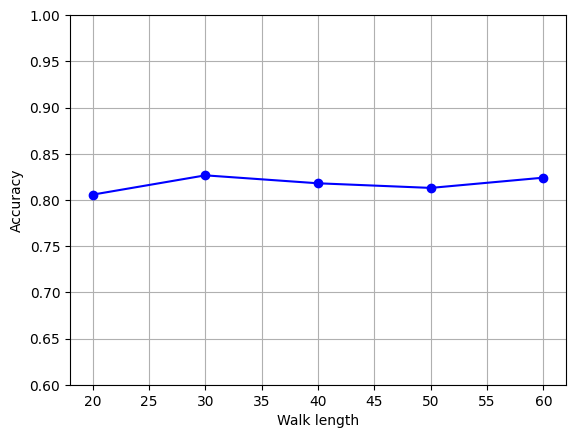

In [21]:
import matplotlib.pyplot as plt

plt.plot(x_walk, y_walk, marker='o', linestyle='-', color='b')
plt.xlabel('Walk length')
plt.ylabel('Accuracy')
plt.ylim((0.6,1))
plt.grid(True)
plt.show()

In [22]:
model = Node2Vec(data.edge_index, embedding_dim=128, 
                 walk_length=20,                        # lenght of rw
                 context_size=10, walks_per_node=40,    
                 num_negative_samples=1,                # una negativa por cada positiva 
                 p=200, q=0.1,                            # bias parameters
                 sparse=True).to(device)

loader = model.loader(batch_size=128, shuffle=True, num_workers=4)
optimizer = torch.optim.SparseAdam(list(model.parameters()), lr=0.01)

for epoch in range(1, 50):
    loss = train()
    acc = test()
    print(f'Epoch: {epoch:02d}, Loss: {loss:.4f}, Acc: {acc:.4f}')


@torch.no_grad()
def return_model():
    model.eval()
    z = model(torch.arange(data.num_nodes, device=device))
    X = z.cpu().numpy()
    return X

X = return_model()
y = data.y.numpy()

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train a classifier
clf = LogisticRegression(max_iter=1000)
clf.fit(X_train, y_train)

# Predict and evaluate
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

  0%|          | 0/22 [00:00<?, ?it/s]

Epoch: 01, Loss: 7.8130, Acc: 0.1760


  0%|          | 0/22 [00:00<?, ?it/s]

Epoch: 02, Loss: 5.5570, Acc: 0.2200


  0%|          | 0/22 [00:00<?, ?it/s]

Epoch: 03, Loss: 4.2949, Acc: 0.2600


  0%|          | 0/22 [00:00<?, ?it/s]

Epoch: 04, Loss: 3.3988, Acc: 0.3100


  0%|          | 0/22 [00:00<?, ?it/s]

Epoch: 05, Loss: 2.7397, Acc: 0.3550


  0%|          | 0/22 [00:00<?, ?it/s]

Epoch: 06, Loss: 2.2608, Acc: 0.4000


  0%|          | 0/22 [00:00<?, ?it/s]

Epoch: 07, Loss: 1.9059, Acc: 0.4400


  0%|          | 0/22 [00:00<?, ?it/s]

Epoch: 08, Loss: 1.6456, Acc: 0.4760


  0%|          | 0/22 [00:00<?, ?it/s]

Epoch: 09, Loss: 1.4504, Acc: 0.5010


  0%|          | 0/22 [00:00<?, ?it/s]

Epoch: 10, Loss: 1.3059, Acc: 0.5380


  0%|          | 0/22 [00:00<?, ?it/s]

Epoch: 11, Loss: 1.2022, Acc: 0.5700


  0%|          | 0/22 [00:00<?, ?it/s]

Epoch: 12, Loss: 1.1245, Acc: 0.5860


  0%|          | 0/22 [00:00<?, ?it/s]

Epoch: 13, Loss: 1.0653, Acc: 0.5940


  0%|          | 0/22 [00:00<?, ?it/s]

Epoch: 14, Loss: 1.0216, Acc: 0.6170


  0%|          | 0/22 [00:00<?, ?it/s]

Epoch: 15, Loss: 0.9878, Acc: 0.6360


  0%|          | 0/22 [00:00<?, ?it/s]

Epoch: 16, Loss: 0.9623, Acc: 0.6480


  0%|          | 0/22 [00:00<?, ?it/s]

Epoch: 17, Loss: 0.9414, Acc: 0.6560


  0%|          | 0/22 [00:00<?, ?it/s]

Epoch: 18, Loss: 0.9247, Acc: 0.6670


  0%|          | 0/22 [00:00<?, ?it/s]

Epoch: 19, Loss: 0.9113, Acc: 0.6720


  0%|          | 0/22 [00:00<?, ?it/s]

Epoch: 20, Loss: 0.8997, Acc: 0.6760


  0%|          | 0/22 [00:00<?, ?it/s]

Epoch: 21, Loss: 0.8908, Acc: 0.6700


  0%|          | 0/22 [00:00<?, ?it/s]

Epoch: 22, Loss: 0.8831, Acc: 0.6840


  0%|          | 0/22 [00:00<?, ?it/s]

Epoch: 23, Loss: 0.8763, Acc: 0.6780


  0%|          | 0/22 [00:00<?, ?it/s]

Epoch: 24, Loss: 0.8708, Acc: 0.6830


  0%|          | 0/22 [00:00<?, ?it/s]

Epoch: 25, Loss: 0.8663, Acc: 0.6930


  0%|          | 0/22 [00:00<?, ?it/s]

Epoch: 26, Loss: 0.8615, Acc: 0.6920


  0%|          | 0/22 [00:00<?, ?it/s]

Epoch: 27, Loss: 0.8578, Acc: 0.6860


  0%|          | 0/22 [00:00<?, ?it/s]

Epoch: 28, Loss: 0.8549, Acc: 0.6830


  0%|          | 0/22 [00:00<?, ?it/s]

Epoch: 29, Loss: 0.8519, Acc: 0.6890


  0%|          | 0/22 [00:00<?, ?it/s]

Epoch: 30, Loss: 0.8492, Acc: 0.6860


  0%|          | 0/22 [00:00<?, ?it/s]

Epoch: 31, Loss: 0.8473, Acc: 0.6870


  0%|          | 0/22 [00:00<?, ?it/s]

Epoch: 32, Loss: 0.8446, Acc: 0.6940


  0%|          | 0/22 [00:00<?, ?it/s]

Epoch: 33, Loss: 0.8436, Acc: 0.6970


  0%|          | 0/22 [00:00<?, ?it/s]

Epoch: 34, Loss: 0.8413, Acc: 0.6880


  0%|          | 0/22 [00:00<?, ?it/s]

Epoch: 35, Loss: 0.8401, Acc: 0.6890


  0%|          | 0/22 [00:00<?, ?it/s]

Epoch: 36, Loss: 0.8386, Acc: 0.6940


  0%|          | 0/22 [00:00<?, ?it/s]

Epoch: 37, Loss: 0.8370, Acc: 0.6960


  0%|          | 0/22 [00:00<?, ?it/s]

Epoch: 38, Loss: 0.8364, Acc: 0.6920


  0%|          | 0/22 [00:00<?, ?it/s]

Epoch: 39, Loss: 0.8361, Acc: 0.6900


  0%|          | 0/22 [00:00<?, ?it/s]

Epoch: 40, Loss: 0.8345, Acc: 0.6840


  0%|          | 0/22 [00:00<?, ?it/s]

Epoch: 41, Loss: 0.8342, Acc: 0.6900


  0%|          | 0/22 [00:00<?, ?it/s]

Epoch: 42, Loss: 0.8328, Acc: 0.6950


  0%|          | 0/22 [00:00<?, ?it/s]

Epoch: 43, Loss: 0.8325, Acc: 0.6970


  0%|          | 0/22 [00:00<?, ?it/s]

Epoch: 44, Loss: 0.8307, Acc: 0.6920


  0%|          | 0/22 [00:00<?, ?it/s]

Epoch: 45, Loss: 0.8305, Acc: 0.6900


  0%|          | 0/22 [00:00<?, ?it/s]

Epoch: 46, Loss: 0.8293, Acc: 0.6910


  0%|          | 0/22 [00:00<?, ?it/s]

Epoch: 47, Loss: 0.8299, Acc: 0.6970


  0%|          | 0/22 [00:00<?, ?it/s]

Epoch: 48, Loss: 0.8296, Acc: 0.6940


  0%|          | 0/22 [00:00<?, ?it/s]

Epoch: 49, Loss: 0.8288, Acc: 0.7010
Accuracy: 0.8130


In [23]:
model = Node2Vec(data.edge_index, embedding_dim=128, 
                 walk_length=20,                        # lenght of rw
                 context_size=10, walks_per_node=40,    
                 num_negative_samples=1,                # una negativa por cada positiva 
                 p=200, q=0.5,                            # bias parameters
                 sparse=True).to(device)

loader = model.loader(batch_size=128, shuffle=True, num_workers=4)
optimizer = torch.optim.SparseAdam(list(model.parameters()), lr=0.01)

for epoch in range(1, 50):
    loss = train()
    acc = test()
    print(f'Epoch: {epoch:02d}, Loss: {loss:.4f}, Acc: {acc:.4f}')


@torch.no_grad()
def return_model():
    model.eval()
    z = model(torch.arange(data.num_nodes, device=device))
    X = z.cpu().numpy()
    return X

X = return_model()
y = data.y.numpy()

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train a classifier
clf = LogisticRegression(max_iter=1000)
clf.fit(X_train, y_train)

# Predict and evaluate
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

  0%|          | 0/22 [00:00<?, ?it/s]

Epoch: 01, Loss: 7.7859, Acc: 0.1680


  0%|          | 0/22 [00:00<?, ?it/s]

Epoch: 02, Loss: 5.5428, Acc: 0.1980


  0%|          | 0/22 [00:00<?, ?it/s]

Epoch: 03, Loss: 4.2935, Acc: 0.2410


  0%|          | 0/22 [00:00<?, ?it/s]

Epoch: 04, Loss: 3.3934, Acc: 0.2920


  0%|          | 0/22 [00:00<?, ?it/s]

Epoch: 05, Loss: 2.7395, Acc: 0.3360


  0%|          | 0/22 [00:00<?, ?it/s]

Epoch: 06, Loss: 2.2595, Acc: 0.3780


  0%|          | 0/22 [00:00<?, ?it/s]

Epoch: 07, Loss: 1.9067, Acc: 0.4150


  0%|          | 0/22 [00:00<?, ?it/s]

Epoch: 08, Loss: 1.6431, Acc: 0.4570


  0%|          | 0/22 [00:00<?, ?it/s]

Epoch: 09, Loss: 1.4531, Acc: 0.4960


  0%|          | 0/22 [00:00<?, ?it/s]

Epoch: 10, Loss: 1.3087, Acc: 0.5300


  0%|          | 0/22 [00:00<?, ?it/s]

Epoch: 11, Loss: 1.2035, Acc: 0.5700


  0%|          | 0/22 [00:00<?, ?it/s]

Epoch: 12, Loss: 1.1254, Acc: 0.5800


  0%|          | 0/22 [00:00<?, ?it/s]

Epoch: 13, Loss: 1.0689, Acc: 0.6020


  0%|          | 0/22 [00:00<?, ?it/s]

Epoch: 14, Loss: 1.0242, Acc: 0.6200


  0%|          | 0/22 [00:00<?, ?it/s]

Epoch: 15, Loss: 0.9906, Acc: 0.6320


  0%|          | 0/22 [00:00<?, ?it/s]

Epoch: 16, Loss: 0.9657, Acc: 0.6430


  0%|          | 0/22 [00:00<?, ?it/s]

Epoch: 17, Loss: 0.9439, Acc: 0.6510


  0%|          | 0/22 [00:00<?, ?it/s]

Epoch: 18, Loss: 0.9283, Acc: 0.6550


  0%|          | 0/22 [00:00<?, ?it/s]

Epoch: 19, Loss: 0.9144, Acc: 0.6570


  0%|          | 0/22 [00:00<?, ?it/s]

Epoch: 20, Loss: 0.9034, Acc: 0.6630


  0%|          | 0/22 [00:00<?, ?it/s]

Epoch: 21, Loss: 0.8934, Acc: 0.6670


  0%|          | 0/22 [00:00<?, ?it/s]

Epoch: 22, Loss: 0.8860, Acc: 0.6790


  0%|          | 0/22 [00:00<?, ?it/s]

Epoch: 23, Loss: 0.8795, Acc: 0.6720


  0%|          | 0/22 [00:00<?, ?it/s]

Epoch: 24, Loss: 0.8736, Acc: 0.6750


  0%|          | 0/22 [00:00<?, ?it/s]

Epoch: 25, Loss: 0.8683, Acc: 0.6750


  0%|          | 0/22 [00:00<?, ?it/s]

Epoch: 26, Loss: 0.8636, Acc: 0.6810


  0%|          | 0/22 [00:00<?, ?it/s]

Epoch: 27, Loss: 0.8614, Acc: 0.6850


  0%|          | 0/22 [00:00<?, ?it/s]

Epoch: 28, Loss: 0.8579, Acc: 0.6880


  0%|          | 0/22 [00:00<?, ?it/s]

Epoch: 29, Loss: 0.8542, Acc: 0.6920


  0%|          | 0/22 [00:00<?, ?it/s]

Epoch: 30, Loss: 0.8513, Acc: 0.6880


  0%|          | 0/22 [00:00<?, ?it/s]

Epoch: 31, Loss: 0.8485, Acc: 0.6940


  0%|          | 0/22 [00:00<?, ?it/s]

Epoch: 32, Loss: 0.8475, Acc: 0.7010


  0%|          | 0/22 [00:00<?, ?it/s]

Epoch: 33, Loss: 0.8454, Acc: 0.7000


  0%|          | 0/22 [00:00<?, ?it/s]

Epoch: 34, Loss: 0.8428, Acc: 0.6970


  0%|          | 0/22 [00:00<?, ?it/s]

Epoch: 35, Loss: 0.8414, Acc: 0.7060


  0%|          | 0/22 [00:00<?, ?it/s]

Epoch: 36, Loss: 0.8404, Acc: 0.7050


  0%|          | 0/22 [00:00<?, ?it/s]

Epoch: 37, Loss: 0.8382, Acc: 0.7020


  0%|          | 0/22 [00:00<?, ?it/s]

Epoch: 38, Loss: 0.8376, Acc: 0.7000


  0%|          | 0/22 [00:00<?, ?it/s]

Epoch: 39, Loss: 0.8364, Acc: 0.7070


  0%|          | 0/22 [00:00<?, ?it/s]

Epoch: 40, Loss: 0.8361, Acc: 0.7080


  0%|          | 0/22 [00:00<?, ?it/s]

Epoch: 41, Loss: 0.8347, Acc: 0.7110


  0%|          | 0/22 [00:00<?, ?it/s]

Epoch: 42, Loss: 0.8340, Acc: 0.7030


  0%|          | 0/22 [00:00<?, ?it/s]

Epoch: 43, Loss: 0.8332, Acc: 0.7080


  0%|          | 0/22 [00:00<?, ?it/s]

Epoch: 44, Loss: 0.8322, Acc: 0.7080


  0%|          | 0/22 [00:00<?, ?it/s]

Epoch: 45, Loss: 0.8325, Acc: 0.7090


  0%|          | 0/22 [00:00<?, ?it/s]

Epoch: 46, Loss: 0.8310, Acc: 0.7040


  0%|          | 0/22 [00:00<?, ?it/s]

Epoch: 47, Loss: 0.8304, Acc: 0.7020


  0%|          | 0/22 [00:00<?, ?it/s]

Epoch: 48, Loss: 0.8300, Acc: 0.7030


  0%|          | 0/22 [00:00<?, ?it/s]

Epoch: 49, Loss: 0.8301, Acc: 0.7020
Accuracy: 0.8315


In [24]:
model = Node2Vec(data.edge_index, embedding_dim=128, 
                 walk_length=20,                        # lenght of rw
                 context_size=10, walks_per_node=40,    
                 num_negative_samples=1,                # una negativa por cada positiva 
                 p=200, q=1,                            # bias parameters
                 sparse=True).to(device)

loader = model.loader(batch_size=128, shuffle=True, num_workers=4)
optimizer = torch.optim.SparseAdam(list(model.parameters()), lr=0.01)

for epoch in range(1, 50):
    loss = train()
    acc = test()
    print(f'Epoch: {epoch:02d}, Loss: {loss:.4f}, Acc: {acc:.4f}')


@torch.no_grad()
def return_model():
    model.eval()
    z = model(torch.arange(data.num_nodes, device=device))
    X = z.cpu().numpy()
    return X

X = return_model()
y = data.y.numpy()

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train a classifier
clf = LogisticRegression(max_iter=1000)
clf.fit(X_train, y_train)

# Predict and evaluate
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

  0%|          | 0/22 [00:00<?, ?it/s]

Epoch: 01, Loss: 7.8611, Acc: 0.1660


  0%|          | 0/22 [00:00<?, ?it/s]

Epoch: 02, Loss: 5.5603, Acc: 0.2010


  0%|          | 0/22 [00:00<?, ?it/s]

Epoch: 03, Loss: 4.3092, Acc: 0.2480


  0%|          | 0/22 [00:00<?, ?it/s]

Epoch: 04, Loss: 3.4061, Acc: 0.2950


  0%|          | 0/22 [00:00<?, ?it/s]

Epoch: 05, Loss: 2.7543, Acc: 0.3380


  0%|          | 0/22 [00:00<?, ?it/s]

Epoch: 06, Loss: 2.2718, Acc: 0.3790


  0%|          | 0/22 [00:00<?, ?it/s]

Epoch: 07, Loss: 1.9210, Acc: 0.4040


  0%|          | 0/22 [00:00<?, ?it/s]

Epoch: 08, Loss: 1.6559, Acc: 0.4420


  0%|          | 0/22 [00:00<?, ?it/s]

Epoch: 09, Loss: 1.4614, Acc: 0.4810


  0%|          | 0/22 [00:00<?, ?it/s]

Epoch: 10, Loss: 1.3157, Acc: 0.5230


  0%|          | 0/22 [00:00<?, ?it/s]

Epoch: 11, Loss: 1.2102, Acc: 0.5600


  0%|          | 0/22 [00:00<?, ?it/s]

Epoch: 12, Loss: 1.1320, Acc: 0.5840


  0%|          | 0/22 [00:00<?, ?it/s]

Epoch: 13, Loss: 1.0719, Acc: 0.6150


  0%|          | 0/22 [00:00<?, ?it/s]

Epoch: 14, Loss: 1.0278, Acc: 0.6340


  0%|          | 0/22 [00:00<?, ?it/s]

Epoch: 15, Loss: 0.9943, Acc: 0.6490


  0%|          | 0/22 [00:00<?, ?it/s]

Epoch: 16, Loss: 0.9667, Acc: 0.6580


  0%|          | 0/22 [00:00<?, ?it/s]

Epoch: 17, Loss: 0.9450, Acc: 0.6640


  0%|          | 0/22 [00:00<?, ?it/s]

Epoch: 18, Loss: 0.9289, Acc: 0.6700


  0%|          | 0/22 [00:00<?, ?it/s]

Epoch: 19, Loss: 0.9152, Acc: 0.6840


  0%|          | 0/22 [00:00<?, ?it/s]

Epoch: 20, Loss: 0.9035, Acc: 0.6940


  0%|          | 0/22 [00:00<?, ?it/s]

Epoch: 21, Loss: 0.8931, Acc: 0.6940


  0%|          | 0/22 [00:00<?, ?it/s]

Epoch: 22, Loss: 0.8855, Acc: 0.6930


  0%|          | 0/22 [00:00<?, ?it/s]

Epoch: 23, Loss: 0.8791, Acc: 0.6990


  0%|          | 0/22 [00:00<?, ?it/s]

Epoch: 24, Loss: 0.8730, Acc: 0.7070


  0%|          | 0/22 [00:00<?, ?it/s]

Epoch: 25, Loss: 0.8679, Acc: 0.7070


  0%|          | 0/22 [00:00<?, ?it/s]

Epoch: 26, Loss: 0.8641, Acc: 0.7100


  0%|          | 0/22 [00:00<?, ?it/s]

Epoch: 27, Loss: 0.8597, Acc: 0.7130


  0%|          | 0/22 [00:00<?, ?it/s]

Epoch: 28, Loss: 0.8569, Acc: 0.7090


  0%|          | 0/22 [00:00<?, ?it/s]

Epoch: 29, Loss: 0.8542, Acc: 0.7100


  0%|          | 0/22 [00:00<?, ?it/s]

Epoch: 30, Loss: 0.8515, Acc: 0.7040


  0%|          | 0/22 [00:00<?, ?it/s]

Epoch: 31, Loss: 0.8487, Acc: 0.7050


  0%|          | 0/22 [00:00<?, ?it/s]

Epoch: 32, Loss: 0.8468, Acc: 0.7140


  0%|          | 0/22 [00:00<?, ?it/s]

Epoch: 33, Loss: 0.8450, Acc: 0.7200


  0%|          | 0/22 [00:00<?, ?it/s]

Epoch: 34, Loss: 0.8426, Acc: 0.7120


  0%|          | 0/22 [00:00<?, ?it/s]

Epoch: 35, Loss: 0.8418, Acc: 0.7120


  0%|          | 0/22 [00:00<?, ?it/s]

Epoch: 36, Loss: 0.8402, Acc: 0.7130


  0%|          | 0/22 [00:00<?, ?it/s]

Epoch: 37, Loss: 0.8394, Acc: 0.7240


  0%|          | 0/22 [00:00<?, ?it/s]

Epoch: 38, Loss: 0.8381, Acc: 0.7180


  0%|          | 0/22 [00:00<?, ?it/s]

Epoch: 39, Loss: 0.8367, Acc: 0.7200


  0%|          | 0/22 [00:00<?, ?it/s]

Epoch: 40, Loss: 0.8350, Acc: 0.7170


  0%|          | 0/22 [00:00<?, ?it/s]

Epoch: 41, Loss: 0.8339, Acc: 0.7170


  0%|          | 0/22 [00:00<?, ?it/s]

Epoch: 42, Loss: 0.8344, Acc: 0.7180


  0%|          | 0/22 [00:00<?, ?it/s]

Epoch: 43, Loss: 0.8333, Acc: 0.7190


  0%|          | 0/22 [00:00<?, ?it/s]

Epoch: 44, Loss: 0.8318, Acc: 0.7200


  0%|          | 0/22 [00:00<?, ?it/s]

Epoch: 45, Loss: 0.8313, Acc: 0.7220


  0%|          | 0/22 [00:00<?, ?it/s]

Epoch: 46, Loss: 0.8312, Acc: 0.7190


  0%|          | 0/22 [00:00<?, ?it/s]

Epoch: 47, Loss: 0.8304, Acc: 0.7230


  0%|          | 0/22 [00:00<?, ?it/s]

Epoch: 48, Loss: 0.8303, Acc: 0.7220


  0%|          | 0/22 [00:00<?, ?it/s]

Epoch: 49, Loss: 0.8290, Acc: 0.7270
Accuracy: 0.8130


In [25]:
model = Node2Vec(data.edge_index, embedding_dim=128, 
                 walk_length=20,                        # lenght of rw
                 context_size=10, walks_per_node=40,    
                 num_negative_samples=1,                # una negativa por cada positiva 
                 p=200, q=1.5,                            # bias parameters
                 sparse=True).to(device)

loader = model.loader(batch_size=128, shuffle=True, num_workers=4)
optimizer = torch.optim.SparseAdam(list(model.parameters()), lr=0.01)

for epoch in range(1, 50):
    loss = train()
    acc = test()
    print(f'Epoch: {epoch:02d}, Loss: {loss:.4f}, Acc: {acc:.4f}')


@torch.no_grad()
def return_model():
    model.eval()
    z = model(torch.arange(data.num_nodes, device=device))
    X = z.cpu().numpy()
    return X

X = return_model()
y = data.y.numpy()

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train a classifier
clf = LogisticRegression(max_iter=1000)
clf.fit(X_train, y_train)

# Predict and evaluate
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

  0%|          | 0/22 [00:00<?, ?it/s]

Epoch: 01, Loss: 7.8339, Acc: 0.1660


  0%|          | 0/22 [00:00<?, ?it/s]

Epoch: 02, Loss: 5.5624, Acc: 0.2160


  0%|          | 0/22 [00:00<?, ?it/s]

Epoch: 03, Loss: 4.3164, Acc: 0.2490


  0%|          | 0/22 [00:00<?, ?it/s]

Epoch: 04, Loss: 3.4344, Acc: 0.2920


  0%|          | 0/22 [00:00<?, ?it/s]

Epoch: 05, Loss: 2.7808, Acc: 0.3390


  0%|          | 0/22 [00:00<?, ?it/s]

Epoch: 06, Loss: 2.2989, Acc: 0.3920


  0%|          | 0/22 [00:00<?, ?it/s]

Epoch: 07, Loss: 1.9459, Acc: 0.4230


  0%|          | 0/22 [00:00<?, ?it/s]

Epoch: 08, Loss: 1.6785, Acc: 0.4510


  0%|          | 0/22 [00:00<?, ?it/s]

Epoch: 09, Loss: 1.4819, Acc: 0.4860


  0%|          | 0/22 [00:00<?, ?it/s]

Epoch: 10, Loss: 1.3326, Acc: 0.5070


  0%|          | 0/22 [00:00<?, ?it/s]

Epoch: 11, Loss: 1.2252, Acc: 0.5460


  0%|          | 0/22 [00:00<?, ?it/s]

Epoch: 12, Loss: 1.1432, Acc: 0.5640


  0%|          | 0/22 [00:00<?, ?it/s]

Epoch: 13, Loss: 1.0849, Acc: 0.5890


  0%|          | 0/22 [00:00<?, ?it/s]

Epoch: 14, Loss: 1.0373, Acc: 0.6050


  0%|          | 0/22 [00:00<?, ?it/s]

Epoch: 15, Loss: 1.0026, Acc: 0.6210


  0%|          | 0/22 [00:00<?, ?it/s]

Epoch: 16, Loss: 0.9743, Acc: 0.6270


  0%|          | 0/22 [00:00<?, ?it/s]

Epoch: 17, Loss: 0.9514, Acc: 0.6400


  0%|          | 0/22 [00:00<?, ?it/s]

Epoch: 18, Loss: 0.9346, Acc: 0.6540


  0%|          | 0/22 [00:00<?, ?it/s]

Epoch: 19, Loss: 0.9203, Acc: 0.6600


  0%|          | 0/22 [00:00<?, ?it/s]

Epoch: 20, Loss: 0.9083, Acc: 0.6590


  0%|          | 0/22 [00:00<?, ?it/s]

Epoch: 21, Loss: 0.8980, Acc: 0.6710


  0%|          | 0/22 [00:00<?, ?it/s]

Epoch: 22, Loss: 0.8897, Acc: 0.6680


  0%|          | 0/22 [00:00<?, ?it/s]

Epoch: 23, Loss: 0.8822, Acc: 0.6760


  0%|          | 0/22 [00:00<?, ?it/s]

Epoch: 24, Loss: 0.8760, Acc: 0.6740


  0%|          | 0/22 [00:00<?, ?it/s]

Epoch: 25, Loss: 0.8710, Acc: 0.6750


  0%|          | 0/22 [00:00<?, ?it/s]

Epoch: 26, Loss: 0.8665, Acc: 0.6750


  0%|          | 0/22 [00:00<?, ?it/s]

Epoch: 27, Loss: 0.8617, Acc: 0.6720


  0%|          | 0/22 [00:00<?, ?it/s]

Epoch: 28, Loss: 0.8582, Acc: 0.6790


  0%|          | 0/22 [00:00<?, ?it/s]

Epoch: 29, Loss: 0.8553, Acc: 0.6840


  0%|          | 0/22 [00:00<?, ?it/s]

Epoch: 30, Loss: 0.8517, Acc: 0.6870


  0%|          | 0/22 [00:00<?, ?it/s]

Epoch: 31, Loss: 0.8499, Acc: 0.6910


  0%|          | 0/22 [00:00<?, ?it/s]

Epoch: 32, Loss: 0.8471, Acc: 0.6900


  0%|          | 0/22 [00:00<?, ?it/s]

Epoch: 33, Loss: 0.8448, Acc: 0.6910


  0%|          | 0/22 [00:00<?, ?it/s]

Epoch: 34, Loss: 0.8432, Acc: 0.6900


  0%|          | 0/22 [00:00<?, ?it/s]

Epoch: 35, Loss: 0.8411, Acc: 0.6910


  0%|          | 0/22 [00:00<?, ?it/s]

Epoch: 36, Loss: 0.8401, Acc: 0.6950


  0%|          | 0/22 [00:00<?, ?it/s]

Epoch: 37, Loss: 0.8384, Acc: 0.7010


  0%|          | 0/22 [00:00<?, ?it/s]

Epoch: 38, Loss: 0.8372, Acc: 0.7050


  0%|          | 0/22 [00:00<?, ?it/s]

Epoch: 39, Loss: 0.8356, Acc: 0.7080


  0%|          | 0/22 [00:00<?, ?it/s]

Epoch: 40, Loss: 0.8355, Acc: 0.7030


  0%|          | 0/22 [00:00<?, ?it/s]

Epoch: 41, Loss: 0.8344, Acc: 0.6980


  0%|          | 0/22 [00:00<?, ?it/s]

Epoch: 42, Loss: 0.8334, Acc: 0.7000


  0%|          | 0/22 [00:00<?, ?it/s]

Epoch: 43, Loss: 0.8319, Acc: 0.6980


  0%|          | 0/22 [00:00<?, ?it/s]

Epoch: 44, Loss: 0.8309, Acc: 0.7030


  0%|          | 0/22 [00:00<?, ?it/s]

Epoch: 45, Loss: 0.8311, Acc: 0.7020


  0%|          | 0/22 [00:00<?, ?it/s]

Epoch: 46, Loss: 0.8301, Acc: 0.7000


  0%|          | 0/22 [00:00<?, ?it/s]

Epoch: 47, Loss: 0.8293, Acc: 0.7080


  0%|          | 0/22 [00:00<?, ?it/s]

Epoch: 48, Loss: 0.8281, Acc: 0.7050


  0%|          | 0/22 [00:00<?, ?it/s]

Epoch: 49, Loss: 0.8280, Acc: 0.7060
Accuracy: 0.7934


In [26]:
model = Node2Vec(data.edge_index, embedding_dim=128, 
                 walk_length=20,                        # lenght of rw
                 context_size=10, walks_per_node=40,    
                 num_negative_samples=1,                # una negativa por cada positiva 
                 p=200, q=2,                            # bias parameters
                 sparse=True).to(device)

loader = model.loader(batch_size=128, shuffle=True, num_workers=4)
optimizer = torch.optim.SparseAdam(list(model.parameters()), lr=0.01)

for epoch in range(1, 50):
    loss = train()
    acc = test()
    print(f'Epoch: {epoch:02d}, Loss: {loss:.4f}, Acc: {acc:.4f}')


@torch.no_grad()
def return_model():
    model.eval()
    z = model(torch.arange(data.num_nodes, device=device))
    X = z.cpu().numpy()
    return X

X = return_model()
y = data.y.numpy()

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train a classifier
clf = LogisticRegression(max_iter=1000)
clf.fit(X_train, y_train)

# Predict and evaluate
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

  0%|          | 0/22 [00:00<?, ?it/s]

Epoch: 01, Loss: 7.7934, Acc: 0.1450


  0%|          | 0/22 [00:00<?, ?it/s]

Epoch: 02, Loss: 5.5466, Acc: 0.1720


  0%|          | 0/22 [00:00<?, ?it/s]

Epoch: 03, Loss: 4.3172, Acc: 0.2220


  0%|          | 0/22 [00:00<?, ?it/s]

Epoch: 04, Loss: 3.4294, Acc: 0.2750


  0%|          | 0/22 [00:00<?, ?it/s]

Epoch: 05, Loss: 2.7693, Acc: 0.3240


  0%|          | 0/22 [00:00<?, ?it/s]

Epoch: 06, Loss: 2.2912, Acc: 0.3580


  0%|          | 0/22 [00:00<?, ?it/s]

Epoch: 07, Loss: 1.9314, Acc: 0.3920


  0%|          | 0/22 [00:00<?, ?it/s]

Epoch: 08, Loss: 1.6690, Acc: 0.4210


  0%|          | 0/22 [00:00<?, ?it/s]

Epoch: 09, Loss: 1.4707, Acc: 0.4450


  0%|          | 0/22 [00:00<?, ?it/s]

Epoch: 10, Loss: 1.3244, Acc: 0.4880


  0%|          | 0/22 [00:00<?, ?it/s]

Epoch: 11, Loss: 1.2159, Acc: 0.5130


  0%|          | 0/22 [00:00<?, ?it/s]

Epoch: 12, Loss: 1.1349, Acc: 0.5390


  0%|          | 0/22 [00:00<?, ?it/s]

Epoch: 13, Loss: 1.0764, Acc: 0.5610


  0%|          | 0/22 [00:00<?, ?it/s]

Epoch: 14, Loss: 1.0304, Acc: 0.5810


  0%|          | 0/22 [00:00<?, ?it/s]

Epoch: 15, Loss: 0.9956, Acc: 0.5950


  0%|          | 0/22 [00:00<?, ?it/s]

Epoch: 16, Loss: 0.9687, Acc: 0.6240


  0%|          | 0/22 [00:00<?, ?it/s]

Epoch: 17, Loss: 0.9447, Acc: 0.6320


  0%|          | 0/22 [00:00<?, ?it/s]

Epoch: 18, Loss: 0.9270, Acc: 0.6480


  0%|          | 0/22 [00:00<?, ?it/s]

Epoch: 19, Loss: 0.9137, Acc: 0.6570


  0%|          | 0/22 [00:00<?, ?it/s]

Epoch: 20, Loss: 0.9022, Acc: 0.6540


  0%|          | 0/22 [00:00<?, ?it/s]

Epoch: 21, Loss: 0.8917, Acc: 0.6610


  0%|          | 0/22 [00:00<?, ?it/s]

Epoch: 22, Loss: 0.8837, Acc: 0.6670


  0%|          | 0/22 [00:00<?, ?it/s]

Epoch: 23, Loss: 0.8762, Acc: 0.6770


  0%|          | 0/22 [00:00<?, ?it/s]

Epoch: 24, Loss: 0.8699, Acc: 0.6800


  0%|          | 0/22 [00:00<?, ?it/s]

Epoch: 25, Loss: 0.8651, Acc: 0.6820


  0%|          | 0/22 [00:00<?, ?it/s]

Epoch: 26, Loss: 0.8602, Acc: 0.6840


  0%|          | 0/22 [00:00<?, ?it/s]

Epoch: 27, Loss: 0.8572, Acc: 0.6870


  0%|          | 0/22 [00:00<?, ?it/s]

Epoch: 28, Loss: 0.8532, Acc: 0.6920


  0%|          | 0/22 [00:00<?, ?it/s]

Epoch: 29, Loss: 0.8489, Acc: 0.6970


  0%|          | 0/22 [00:00<?, ?it/s]

Epoch: 30, Loss: 0.8472, Acc: 0.6970


  0%|          | 0/22 [00:00<?, ?it/s]

Epoch: 31, Loss: 0.8449, Acc: 0.7010


  0%|          | 0/22 [00:00<?, ?it/s]

Epoch: 32, Loss: 0.8420, Acc: 0.7000


  0%|          | 0/22 [00:00<?, ?it/s]

Epoch: 33, Loss: 0.8405, Acc: 0.7050


  0%|          | 0/22 [00:00<?, ?it/s]

Epoch: 34, Loss: 0.8379, Acc: 0.7120


  0%|          | 0/22 [00:00<?, ?it/s]

Epoch: 35, Loss: 0.8377, Acc: 0.7120


  0%|          | 0/22 [00:00<?, ?it/s]

Epoch: 36, Loss: 0.8360, Acc: 0.7060


  0%|          | 0/22 [00:00<?, ?it/s]

Epoch: 37, Loss: 0.8341, Acc: 0.7040


  0%|          | 0/22 [00:00<?, ?it/s]

Epoch: 38, Loss: 0.8330, Acc: 0.7080


  0%|          | 0/22 [00:00<?, ?it/s]

Epoch: 39, Loss: 0.8317, Acc: 0.7070


  0%|          | 0/22 [00:00<?, ?it/s]

Epoch: 40, Loss: 0.8314, Acc: 0.7090


  0%|          | 0/22 [00:00<?, ?it/s]

Epoch: 41, Loss: 0.8291, Acc: 0.7080


  0%|          | 0/22 [00:00<?, ?it/s]

Epoch: 42, Loss: 0.8291, Acc: 0.7140


  0%|          | 0/22 [00:00<?, ?it/s]

Epoch: 43, Loss: 0.8274, Acc: 0.7130


  0%|          | 0/22 [00:00<?, ?it/s]

Epoch: 44, Loss: 0.8275, Acc: 0.7150


  0%|          | 0/22 [00:00<?, ?it/s]

Epoch: 45, Loss: 0.8264, Acc: 0.7120


  0%|          | 0/22 [00:00<?, ?it/s]

Epoch: 46, Loss: 0.8261, Acc: 0.7140


  0%|          | 0/22 [00:00<?, ?it/s]

Epoch: 47, Loss: 0.8252, Acc: 0.7140


  0%|          | 0/22 [00:00<?, ?it/s]

Epoch: 48, Loss: 0.8249, Acc: 0.7160


  0%|          | 0/22 [00:00<?, ?it/s]

Epoch: 49, Loss: 0.8241, Acc: 0.7130
Accuracy: 0.8093


In [27]:
x_q = [0.1, 0.5, 1, 1.5, 2.0]
y_q = [0.8130, 0.8315, 0.8130, 0.7934, 0.8093]

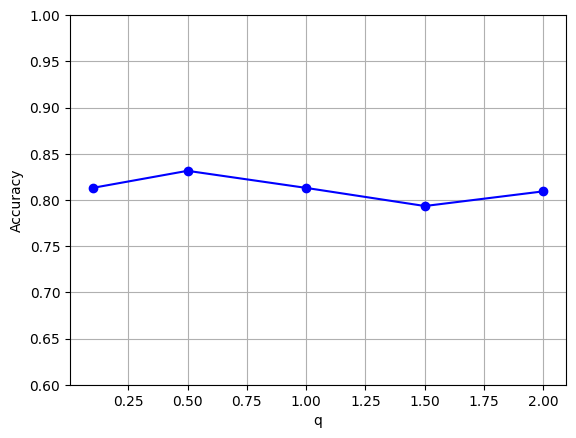

In [28]:
plt.plot(x_q, y_q, marker='o', linestyle='-', color='b')
plt.xlabel('q')
plt.ylabel('Accuracy')
plt.ylim((0.6,1))
plt.grid(True)
plt.show()